# Webscraping

In [1]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen
import collections
from urllib.parse import urljoin
import seaborn as sns
import matplotlib.pyplot as plt

### Functions created to scrape indeed for data science skills

In [2]:
def count_in(x):
    if len(x) == 0:
        return(0)
    else:
        return(1)
    
def plot_count(x,total, title):
    sns.set()
    print('Number of Jobs:', total)
    print(x)
    fig = plt.figure(figsize = (16,8))
    sns.barplot(x='language', y='Count', data=x).set_title(title,fontsize=20)
    plt.xlabel('Skill',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    ax = plt.gca()
    for nr, p in enumerate(ax.patches):
        height = round(p.get_height(),0)
        ax.text(nr, height + 2.0,'{}'.format(int(height)), color='black',fontsize=15,  ha='center', va='center')

In [3]:
def getlink(url,x):
    lang = ["C","C++","Java","Javascript","Python","R","SQL","Hadoop","Hive","Pig","Spark","AWS","Tableau",
            'SAS', 'Excel']
    df2 = pd.DataFrame([], columns = lang)
    for i in range(x): 
        page = urlopen(url)
        soup = BeautifulSoup(page, 'lxml')
        all_matches = soup.findAll(attrs={'rel':['nofollow']})
        for c in all_matches:
            sum_py = 0
            sum_C = 0
            sum_Cplus = 0
            sum_java = 0
            sum_javascript = 0
            sum_r = 0
            sum_sql = 0
            sum_hadoop = 0
            sum_hive = 0
            sum_pig = 0
            sum_spark = 0
            sum_aws = 0 
            sum_tableau = 0
            sum_sas= 0 
            sum_ex = 0 
            jd_url = 'http://www.indeed.com/m/'+c['href']
            response = requests.get(jd_url)
            jd_page = response.text
            jd_soup = BeautifulSoup(jd_page, 'lxml')
            jd_desc = jd_soup.findAll('div',attrs={'id':['desc']}) ## find the structure like: <div id="desc"></>

            C = re.findall(r'[\b\s\/]C\b[\/\s,]', str(jd_desc))
            C2 = count_in(C)
            sum_C = sum_C + C2

            c_plus = re.findall(r'[\b\/\s]?C\+\+[\s,]?', str(jd_desc))
            c_plus2 = count_in(c_plus)
            sum_Cplus = sum_Cplus + c_plus2

            java = re.findall(r'[\/\b\s]?Java[\b,\/]?', str(jd_desc))
            java2 = count_in(java)
            sum_java = sum_java + java2

            javascript = re.findall(r'[\/\s\b]Java[Ss]cript[\/\b\s,]?', str(jd_desc))
            javascript2 = count_in(javascript)
            sum_javascript = sum_javascript + javascript2

            python = re.findall(r'[\/\b]?[Pp]ython[\s\/,]?', str(jd_desc))
            python2 = count_in(python)
            sum_py = sum_py + python2

            R = re.findall(r'[\s\/\b]?R[\b\s\/,]', str(jd_desc))
            R2 = count_in(R)
            sum_r = sum_r + R2

            sql = re.findall(r'[\/\b]?SQL[\s\/,]?', str(jd_desc))
            sql2 = count_in(sql)
            sum_sql = sum_sql + sql2

            hadoop = re.findall(r'[\/\b]?Hadoop[\s\/,]?', str(jd_desc))
            hadoop2 = count_in(hadoop)
            sum_hadoop = sum_hadoop + hadoop2

            hive = re.findall(r'[\/\b]?Hive[\s\/,]?', str(jd_desc))
            hive2 = count_in(hive)
            sum_hive = sum_hive + hive2

            pig = re.findall(r'[\/\b]?Pig[\s\/,]?', str(jd_desc))
            pig2 = count_in(pig)
            sum_pig = sum_pig + pig2

            spark = re.findall(r'[\/\b]?Spark[\s\/,]?', str(jd_desc))
            spark2 = count_in(spark)
            sum_spark = sum_spark + spark2

            aws = re.findall(r'[\/\b]?AWS[\s\/,]?', str(jd_desc))
            aws2 = count_in(aws)
            sum_aws = sum_aws + aws2

            tableau = re.findall(r'[\/\b\/]?Tableau[\s\/,]?', str(jd_desc))
            tab2 = count_in(tableau)
            sum_tableau = sum_tableau + tab2
            
            sas = re.findall(r'[\/\b\/]?SAS[\s\/,]?', str(jd_desc))
            sas2 = count_in(sas)
            sum_sas = sum_sas + sas2
            
            excel = re.findall(r'[\/\b\/]?[Ee]xcel[\s\/,]?', str(jd_desc))
            ex2 = count_in(excel)
            sum_ex = sum_ex + ex2

            df = pd.DataFrame([[sum_C,sum_Cplus,sum_java,sum_javascript,sum_py,sum_r,sum_sql,
                        sum_hadoop,sum_hive,sum_pig,sum_spark,sum_aws,sum_tableau,sum_sas, sum_ex]], columns = lang)
            df2 = pd.concat([df,df2], axis =0)
            

        url_all = soup.findAll(attrs={'rel':['next']})
        print(url_all)

        url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])
    df2.reset_index(inplace = True)
    df2.drop('index', inplace = True, axis = 1)
    df3 = df2.sum(axis = 0)
    df4 = pd.DataFrame(df3, columns = ['Count'])
    df4.reset_index(inplace = True)
    df4.rename({'index': 'language'}, inplace = True, axis = 1)
    t_job = len(df2)
    print('Total Jobs:', len(df2))
    return(df2, df4, t_job)

### Nationwide

In [4]:
nw, nw_count, nw_total = getlink("https://www.indeed.com/m/jobs?q=data+science&l=",30)

[<link href="jobs?q=data+science&amp;l=&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=100" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=110" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=120" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=130" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=140" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp

Number of Jobs: 387
      language  Count
0            C   11.0
1          C++   17.0
2         Java   73.0
3   Javascript    8.0
4       Python  228.0
5            R  180.0
6          SQL  167.0
7       Hadoop   64.0
8         Hive   36.0
9          Pig   11.0
10       Spark   64.0
11         AWS   26.0
12     Tableau   44.0
13         SAS   54.0
14       Excel  153.0


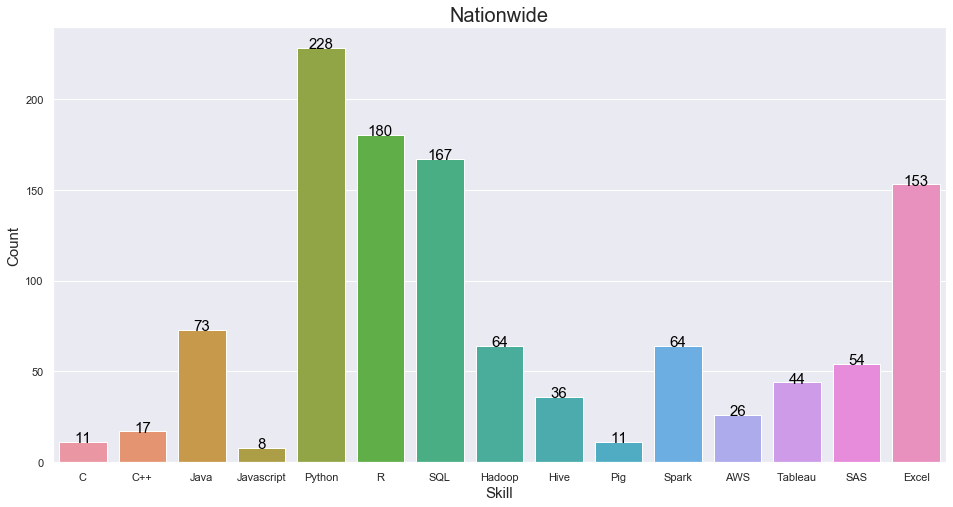

In [5]:
plot_count(nw_count, nw_total, 'Nationwide')

### Washington DC

In [6]:
dc, dc_count, dc_total = getlink("https://www.indeed.com/m/jobs?q=data+science&l=Washington%2C+DC",30)

[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=100" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=110" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=120" rel

Number of Jobs: 388
      language  Count
0            C   13.0
1          C++   33.0
2         Java   91.0
3   Javascript   22.0
4       Python  236.0
5            R  207.0
6          SQL  168.0
7       Hadoop   39.0
8         Hive   21.0
9          Pig   10.0
10       Spark   72.0
11         AWS   78.0
12     Tableau   85.0
13         SAS   56.0
14       Excel  195.0


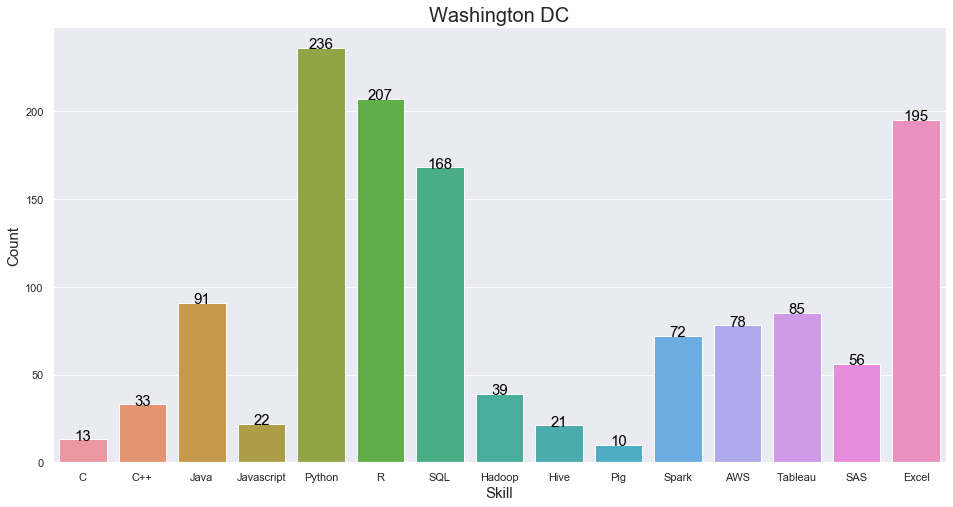

In [7]:
plot_count(dc_count, dc_total, 'Washington DC')

### New York City

In [8]:
ny, ny_count, ny_total = getlink("https://www.indeed.com/m/jobs?q=data+science&l=New+York",30)

[<link href="jobs?q=data+science&amp;l=New+York&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=100" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=110" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=120" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=130" rel="next"/>]
[<link h

In [9]:
ny.tail()

,C,C++,Java,Javascript,Python,R,SQL,Hadoop,Hive,Pig,Spark,AWS,Tableau,SAS,Excel
339,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0
340,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0
341,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Number of Jobs: 344
      language  Count
0            C   10.0
1          C++   21.0
2         Java   69.0
3   Javascript   16.0
4       Python  249.0
5            R  174.0
6          SQL  205.0
7       Hadoop   70.0
8         Hive   38.0
9          Pig    5.0
10       Spark   73.0
11         AWS   47.0
12     Tableau   53.0
13         SAS   35.0
14       Excel  147.0


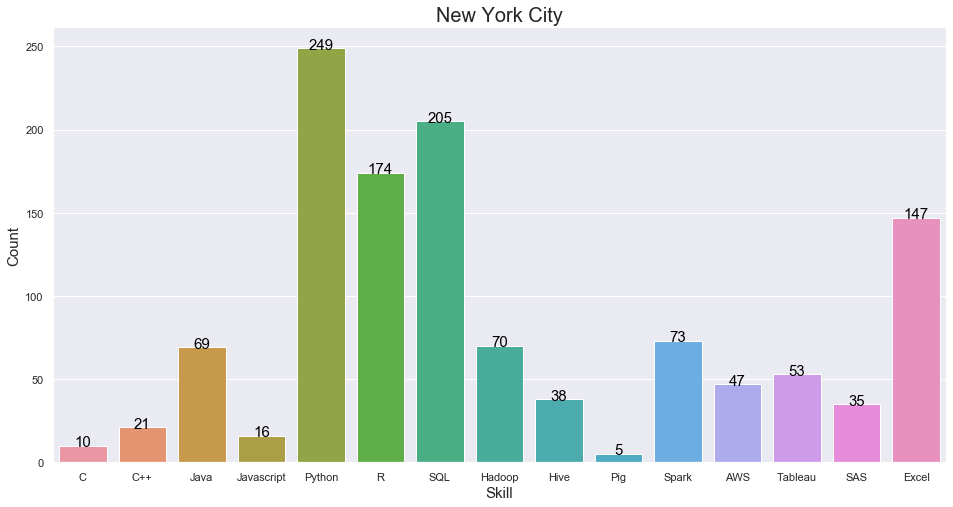

In [10]:
plot_count(ny_count, ny_total, 'New York City')

### San Francisco

In [11]:
sf, sf_count, sf_total = getlink("https://www.indeed.com/m/jobs?q=data+science&l=San+Francisco",30)

[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=49" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=59" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=69" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=79" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=100" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=110" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=120" rel="next"/>]
[<link href="jobs?q=data+

In [12]:
sf.tail()

,C,C++,Java,Javascript,Python,R,SQL,Hadoop,Hive,Pig,Spark,AWS,Tableau,SAS,Excel
324,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0
325,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
326,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
327,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
328,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Number of Jobs: 329
      language  Count
0            C   10.0
1          C++   15.0
2         Java   64.0
3   Javascript    9.0
4       Python  228.0
5            R  129.0
6          SQL  171.0
7       Hadoop   66.0
8         Hive   52.0
9          Pig   14.0
10       Spark   80.0
11         AWS   41.0
12     Tableau   49.0
13         SAS   14.0
14       Excel  145.0


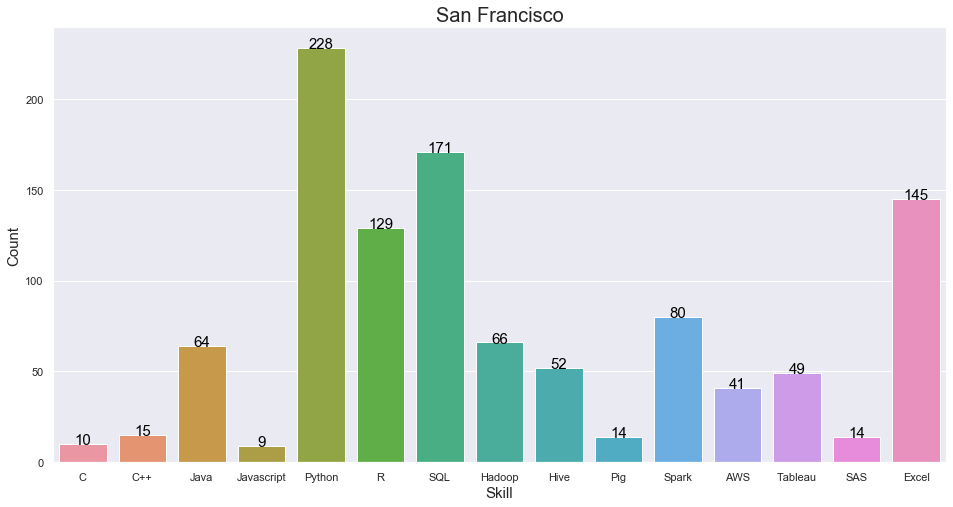

In [13]:
plot_count(sf_count, sf_total, 'San Francisco')

### Chicago

In [14]:
chi,  chi_count, chi_total = getlink("https://www.indeed.com/m/jobs?q=data+science&l=Chicago",30)

[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=100" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=110" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=120" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=130" rel="next"/>]
[<link href="jobs?q=d

In [15]:
chi.tail()

,C,C++,Java,Javascript,Python,R,SQL,Hadoop,Hive,Pig,Spark,AWS,Tableau,SAS,Excel
310,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
312,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
313,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0
314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Number of Jobs: 315
      language  Count
0            C    9.0
1          C++   25.0
2         Java   58.0
3   Javascript   12.0
4       Python  184.0
5            R  129.0
6          SQL  179.0
7       Hadoop   87.0
8         Hive   46.0
9          Pig   14.0
10       Spark  109.0
11         AWS   77.0
12     Tableau   48.0
13         SAS   45.0
14       Excel  139.0


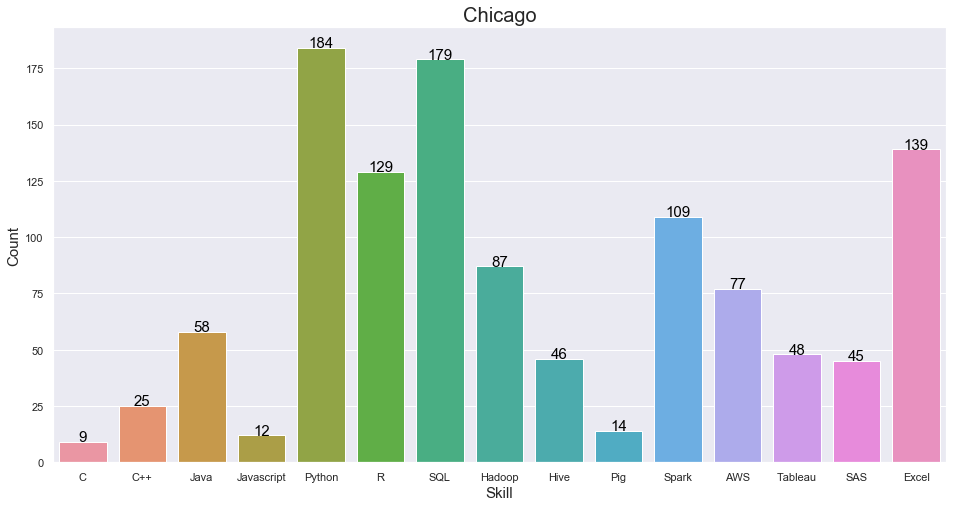

In [16]:
plot_count(chi_count, chi_total, 'Chicago')

### Austin

In [17]:
au,  au_count, au_total = getlink("https://www.indeed.com/m/jobs?q=data+science&l=Austin",20)

[<link href="jobs?q=data+science&amp;l=Austin&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=100" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=110" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=120" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=130" rel="next"/>]
[<link href="jobs?q=data+science&a

In [18]:
au.tail()

,C,C++,Java,Javascript,Python,R,SQL,Hadoop,Hive,Pig,Spark,AWS,Tableau,SAS,Excel
252,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
254,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
255,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
256,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Number of Jobs: 257
      language  Count
0            C   12.0
1          C++   32.0
2         Java   73.0
3   Javascript   14.0
4       Python  188.0
5            R   86.0
6          SQL  181.0
7       Hadoop   66.0
8         Hive   59.0
9          Pig    8.0
10       Spark  109.0
11         AWS   78.0
12     Tableau   57.0
13         SAS   24.0
14       Excel  115.0


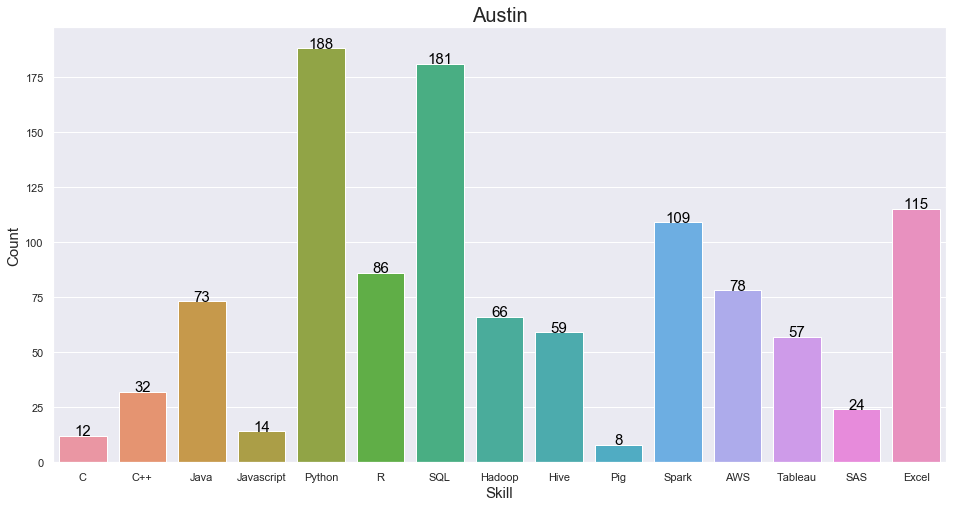

In [19]:
plot_count(au_count, au_total, 'Austin')

### Denver

In [20]:
den,  den_count, den_total = getlink("https://www.indeed.com/m/jobs?q=data+science&l=Denver",20)

[<link href="jobs?q=data+science&amp;l=Denver&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=100" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=110" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=120" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=130" rel="next"/>]
[<link href="jobs?q=data+science&a

In [21]:
den.tail()

,C,C++,Java,Javascript,Python,R,SQL,Hadoop,Hive,Pig,Spark,AWS,Tableau,SAS,Excel
223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
224,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
225,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0
226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
227,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0


Number of Jobs: 228
      language  Count
0            C   12.0
1          C++   25.0
2         Java   63.0
3   Javascript   20.0
4       Python  145.0
5            R  103.0
6          SQL  128.0
7       Hadoop   46.0
8         Hive   21.0
9          Pig    5.0
10       Spark   62.0
11         AWS   52.0
12     Tableau   39.0
13         SAS   18.0
14       Excel  113.0


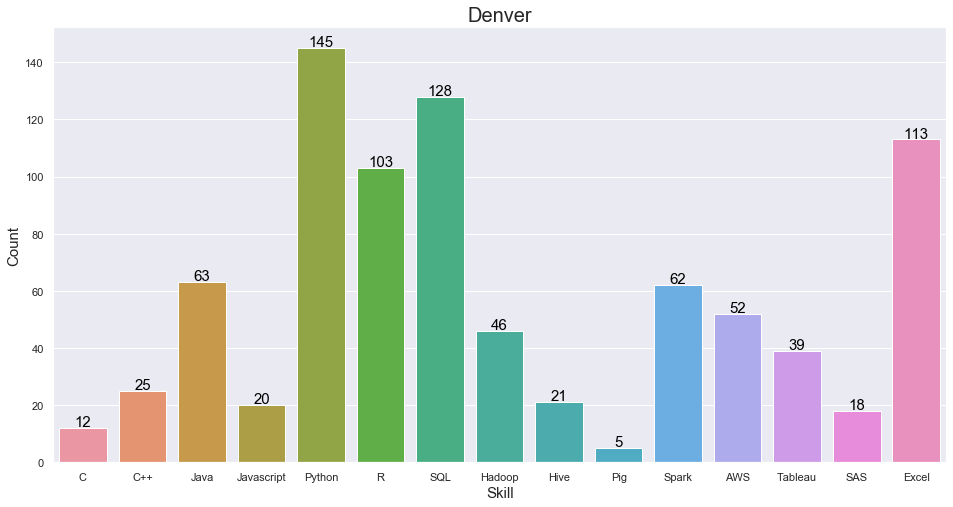

In [22]:
plot_count(den_count, den_total, 'Denver')

### All Cities

In [23]:
df_all = pd.concat([dc,den,ny,sf, au, chi], axis = 0)
df44 = df_all.sum(axis = 0)
df45 = pd.DataFrame(df44, columns = ['Count'])
df45.reset_index(inplace = True)
df45.rename({'index': 'language'}, inplace = True, axis = 1)

Number of Jobs: 1861
      language   Count
0            C    66.0
1          C++   151.0
2         Java   418.0
3   Javascript    93.0
4       Python  1230.0
5            R   828.0
6          SQL  1032.0
7       Hadoop   374.0
8         Hive   237.0
9          Pig    56.0
10       Spark   505.0
11         AWS   373.0
12     Tableau   331.0
13         SAS   192.0
14       Excel   854.0


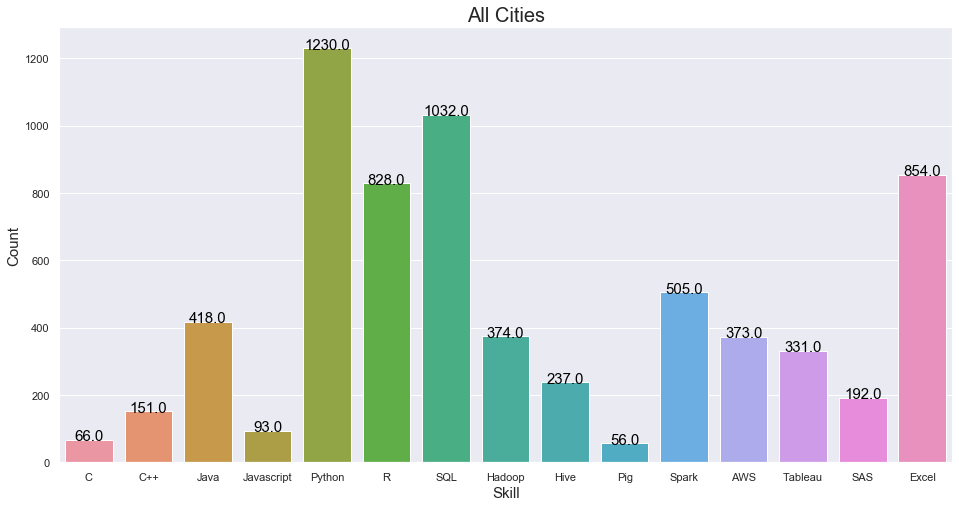

In [29]:
sns.set()
print('Number of Jobs:', len(df_all))
print(df45)
plt.figure(figsize = (16,8))
sns.barplot(x='language', y='Count', data=df45).set_title('All Cities',fontsize=20)
plt.xlabel('Skill',fontsize=15)
plt.ylabel('Count',fontsize=15)
ax = plt.gca()
for nr, p in enumerate(ax.patches):
    height = round(p.get_height(),0)
    ax.text(nr, height + 10,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')

### Creat count dataframe for Tableau

In [34]:
#dc,den,ny,sf, au, chi
dc_count['city'] = 'DC'
den_count['city'] = 'Denver'
ny_count['city'] = 'New York City'
sf_count['city'] = 'San Francisco'
au_count['city'] = 'Austin'
chi_count['city'] = 'Chicago'
df_count = pd.concat([dc_count,den_count,ny_count,sf_count, au_count, chi_count], axis = 0)
df_count.reset_index(inplace =True)
df_count.drop('index', inplace =True, axis = 1)
df_count.to_csv('DS_results.csv')
df_count.tail()

,language,Count,city
85,Spark,109.0,Chicago
86,AWS,77.0,Chicago
87,Tableau,48.0,Chicago
88,SAS,45.0,Chicago
89,Excel,139.0,Chicago
